<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-导入数据集与必要的模块" data-toc-modified-id="1.-导入数据集与必要的模块-1">1. 导入数据集与必要的模块</a></span></li><li><span><a href="#2.-肥胖影响因素可视化分析" data-toc-modified-id="2.-肥胖影响因素可视化分析-2">2. 肥胖影响因素可视化分析</a></span><ul class="toc-item"><li><span><a href="#2.1-探究数值型字段的分布情况" data-toc-modified-id="2.1-探究数值型字段的分布情况-2.1">2.1 探究数值型字段的分布情况</a></span></li><li><span><a href="#2.2-利用直方图探究数值型字段的分布情况" data-toc-modified-id="2.2-利用直方图探究数值型字段的分布情况-2.2">2.2 利用直方图探究数值型字段的分布情况</a></span></li><li><span><a href="#2.3-利用热力图探究数值型字段的相关性" data-toc-modified-id="2.3-利用热力图探究数值型字段的相关性-2.3">2.3 利用热力图探究数值型字段的相关性</a></span></li><li><span><a href="#2.4-利用散点图探究年龄和使用技术设备时间的关系" data-toc-modified-id="2.4-利用散点图探究年龄和使用技术设备时间的关系-2.4">2.4 利用散点图探究年龄和使用技术设备时间的关系</a></span></li><li><span><a href="#2.5-利用饼图探究肥胖程度与性别的关系" data-toc-modified-id="2.5-利用饼图探究肥胖程度与性别的关系-2.5">2.5 利用饼图探究肥胖程度与性别的关系</a></span></li><li><span><a href="#2.6-利用柱状图探究肥胖程度与饮酒频率的关系" data-toc-modified-id="2.6-利用柱状图探究肥胖程度与饮酒频率的关系-2.6">2.6 利用柱状图探究肥胖程度与饮酒频率的关系</a></span></li><li><span><a href="#2.7-利用箱线图探究肥胖程度与年龄的关系" data-toc-modified-id="2.7-利用箱线图探究肥胖程度与年龄的关系-2.7">2.7 利用箱线图探究肥胖程度与年龄的关系</a></span></li></ul></li><li><span><a href="#3.-总结" data-toc-modified-id="3.-总结-3">3. 总结</a></span></li></ul></div>

# 1. 导入数据集与必要的模块

首先，查看各字段的类型以及含义说明。

| 列名 | 类型 | 含义说明 |
|------:|------:|------:|
|**Gender**|字符型|性别|
|**Age**|浮点型|年龄|
|**Height**|浮点型|身高(m)|
|**Weight**|浮点型|体重(kg)|
|**family_history_with_overweight**|字符型|家庭成员是否患有或患有超重|
|**FAVC**|字符型|是否经常吃高热量的食物|
|**FCVC**|浮点型|平时吃饭吃蔬菜的频率|
|**NCP**|浮点型|一天中进餐次数|
|**CAEC**|字符型|两餐之间进食情况|
|**SMOKE**|字符型|是否抽烟|
|**CH2O**|浮点型|每天喝水量（L）|
|**SCC**|字符型|是否检测每天卡路里|
|**FAF**|浮点型|运动的频率（天）|
|**TUE**|浮点型|每日使用技术设备的时间|
|**CALC**|字符型|喝酒的频率|
|**MTRANS**|字符型|通常使用的交通方式|
|**NObeyesdad**|字符型|肥胖程度等级|

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode 
import pyecharts.options as opts

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['font.sans-serif']=['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False     # 用来正常显示负号


# 忽略警告信息
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# 查看数据集的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
# 查看描述性统计数据
data.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [6]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# 2. 肥胖影响因素可视化分析

## 2.1 探究数值型字段的分布情况

通过分别探究非数值型和数值型数据，可以更加直观地看出来数据的具体分布情况，以及各个字段的数据情况。
接下来，由于非数值型数据中，字段`family_history_with_overweight`,`FAVC`,`SMOKE`和`SCC`的数据为`yes`或者`no`，所以可以通过一张堆叠条形图展示。

In [8]:
family_yes = data[data['family_history_with_overweight']=='yes']['family_history_with_overweight'].count()
family_no = data['family_history_with_overweight'].count() - family_yes

high_cal_yes = data[data['FAVC']=='yes']['FAVC'].count()
high_cal_no = data['FAVC'].count() - high_cal_yes

smo_cal_yes = data[data['SMOKE']=='yes']['SMOKE'].count()
smo_cal_no = data['SMOKE'].count() - smo_cal_yes

test_cal_yes = data[data['SCC']=='yes']['SCC'].count()
test_cal_no = data['SCC'].count() - test_cal_yes

In [9]:
high_cal_yes

1866

In [10]:
high_cal_no

245

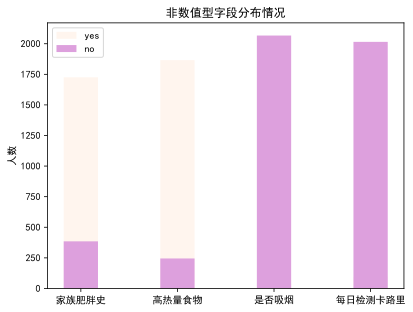

In [11]:
answer = ['yes', 'no']
labels = ['家族肥胖史','高热量食物','是否吸烟','每日检测卡路里']
yes_lable = [family_yes, high_cal_yes, smo_cal_yes, test_cal_yes]
no_lable = [family_no, high_cal_no, smo_cal_no, test_cal_no]


width = 0.355    

fig,ax = plt.subplots()

ax.bar(labels, yes_lable, width, label='yes',color = 'seashell')
ax.bar(labels, no_lable, width, label='no',color = 'plum')

ax.set_ylabel('人数')
ax.set_title('非数值型字段分布情况')
ax.legend()

plt.show()

从图中可以明显看出，大部分的墨西哥人都存在家族肥胖史的问题，大多数人都有摄入高热量食物的习惯；所调查的这部分人群几乎全部不吸烟并且没有每日检测卡路里的习惯。

In [12]:
data['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [13]:
c = (
    Pie()
    .add(
        "", 
        [list(z) for z in zip(['Sometimes', 'no', 'Frequently', 'Always'], data['CALC'].value_counts().tolist())],
        radius=["30%", "45%"],
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .set_global_opts(tooltip_opts =opts.TooltipOpts(formatter=" {a} </br> {b} {d}%",axis_pointer_type = "cross",),legend_opts =opts.LegendOpts(type_='scroll',orient='vertical',pos_left="5%",pos_top= 'middle'),title_opts=opts.TitleOpts(title="喝酒频率分布图",pos_left="center"))                     
    
)
c.render_notebook()

从图中可以得知，大部分人有时会喝些酒，另外一大部分是不喝酒的，很少一部分经常喝酒

In [14]:
list1 = [data[data['CALC']=='Sometimes']['CALC'].count(), data[data['CAEC']=='Sometimes']['CAEC'].count()]
list2 = [data[data['CALC']=='no']['CALC'].count(), data[data['CAEC']=='no']['CAEC'].count()]
list3 = [data[data['CALC']=='Frequently']['CALC'].count(), data[data['CAEC']=='Frequently']['CAEC'].count()]
list4 = [data[data['CALC']=='Always']['CALC'].count(), data[data['CAEC']=='Always']['CAEC'].count()]
print(list1)
print(list2)
print(list3)
print(list4)

[1401, 1765]
[639, 51]
[70, 242]
[1, 53]


In [15]:
from pyecharts.charts import Bar

d = (
    Bar()
    .add_xaxis(['喝酒频率','两餐之间进食情况'])
    .add_yaxis('偶尔', [1401, 1765], stack="stack1")
    .add_yaxis("从不", [639, 51], stack="stack2")
    .add_yaxis("总是", [70, 242], stack="stack3")
    .add_yaxis("经常", [1, 53], stack="stack4")
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .set_colors(["#d65f5f","#8c613c","#dc7ec0","#797979"])
    .set_global_opts(tooltip_opts =opts.TooltipOpts(axis_pointer_type = "cross",),legend_opts =opts.LegendOpts(type_='scroll',orient='vertical',pos_right="5%",pos_top= 'middle'),title_opts=opts.TitleOpts(title="饮酒频率 & 两餐进食情况",pos_left="center"))                     
)
d.render_notebook()

从图中可以看出，偶尔喝酒的人数占比较大，几乎是从不喝酒人数的两倍；大部分人都有偶尔两餐之间进食的习惯，较小一部分会有经常两餐之间进食的习惯。

## 2.2 利用直方图探究数值型字段的分布情况

In [16]:
data.columns[[0,1,2,3,6,7,10,12,13]].tolist()

['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

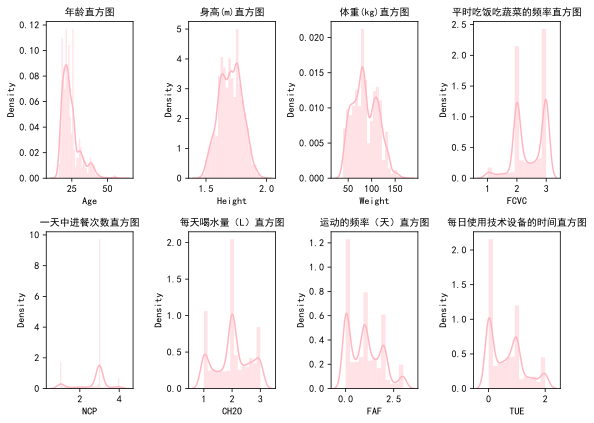

In [18]:
col1 = data.columns[[1,2,3,6,7,10,12,13]].tolist()
fig,ax = plt.subplots(2,4,figsize = (8,6))
column_name = ['年龄','身高(m)','体重(kg)','平时吃饭吃蔬菜的频率','一天中进餐次数','每天喝水量（L）','运动的频率（天）','每日使用技术设备的时间']

j=0
for i in range(2):
    for j in range(4):
        x = data[col1[i * 4 + j]]
        sns.distplot(x, color='lightpink', ax=ax[i, j])
        ax[i, j].set_title(column_name[i * 4 + j] + '直方图', size=10)

plt.tight_layout()
plt.show()

根据上方各个连续性特征的直方图分布情况，可以判断每个字段的特点。首先，根据`Age`的直方图可以看出，此数据集主要研究的人的年龄分布大多在20岁到25岁之间；体重整体分布较为集中，没有明显的离群值。

关于饮食习惯，此数据中包含的人群中大多平时吃蔬菜的频率在2和3之间；其中，一天中进餐次数大多在3次，但也有相当一部分人群进餐次数较少为1次；人群的每天喝水量集中分布在2L。关于日常生活习惯方面，通过此直方图可以得出，大多数人的运动频率较为高；其中该人群使用电子产品的时间多分布在0-2小时之内。

## 2.3 利用热力图探究数值型字段的相关性

Text(0.5, 1.0, '数值型字段热力图')

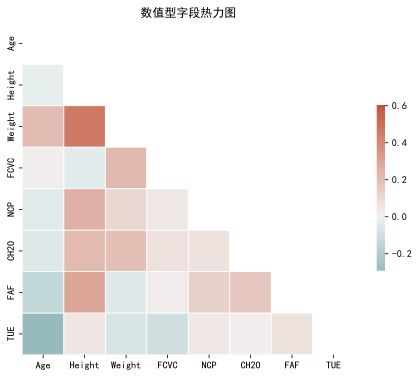

In [19]:
# sns.set_theme(style="white",font_scale=0.8)

d = pd.DataFrame(data=data,
                 columns=data.columns)

corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
ax.set_title('数值型字段热力图')

由图可知，大部分特征之间存在较弱的相关性，`Height`和`Weight`之间存在相对较强的正相关性，`TUE`（每日使用技术设备的时间）和`Age`之间存在相对较强的负相关性。因此可以初步判断此数据集所包含的年龄段在25岁左右的人，使用电子设备的时间较长。

## 2.4 利用散点图探究年龄和使用技术设备时间的关系

通过上面热力图初步得知年龄和使用电子设备之间存在较强的负相关性，接下来用散点图具体查看二者关系。

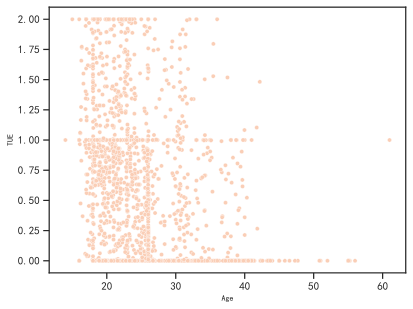

In [20]:
sns.scatterplot(data=data, x=data['Age'], y=data['TUE'],size =8,color = "#faceb6",legend = False)

plt.xlabel('Age', fontsize=8)
plt.ylabel('TUE', fontsize=8)

plt.show()

从图中可以得知，年龄在20岁左右的人群整体使用技术设备的时间较长，随着年龄的增长，每日使用技术设备的时间在减少。

## 2.5 利用饼图探究肥胖程度与性别的关系

In [21]:
# 查看不同的肥胖程度等级
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [22]:
data[data['Gender']=='Female'].groupby(['NObeyesdad']).size().tolist()

[173, 141, 156, 2, 323, 145, 103]

In [24]:
# 女性中中`NObeyesdad`分布数据
female_type = ['正常', '超重I', '超重II',
       '肥胖I', '体重不足', '肥胖II',
       '肥胖III']
female_data = data[data['Gender']=='Female'].groupby(['NObeyesdad']).size().tolist()
# 男性中中`NObeyesdad`分布数据
male_type = ['正常', '超重I', '超重II',
       '肥胖I', '体重不足', '肥胖II',
       '肥胖III']
male_type.reverse()
male_data = data[data['Gender']=='Male'].groupby(['NObeyesdad']).size().tolist()
male_data.reverse()

# 数据赋值 之 内部 饼图
inner_x_data = ["女性", "男性"]
inner_y_data = data.groupby(['Gender']).size().tolist()
inner_data_pair = [list(z) for z in zip(inner_x_data, inner_y_data)]
# 数据赋值 之 外部 饼图
outer_x_data = female_type + male_type
outer_y_data = female_data + male_data
outer_data_pair = [list(z) for z in zip(outer_x_data, outer_y_data)]

# 参数配置
(
    Pie(init_opts=opts.InitOpts())
    .add(
        series_name="性别:",
        data_pair=inner_data_pair,
        radius=[0, "30%"],        # 饼图半径大小范围
        center=["45%","55%"],     # 饼图圆心相对位置
        label_opts=opts.LabelOpts(position="inner",formatter="{b} \n\n {d}%"),
        rosetype = ['radius']     # 展示成南丁格尔图
        
    )    
    .add(
        series_name="肥胖程度:",
        data_pair=outer_data_pair,
        radius=["31%","50%"],
        center=["45%","55%"],
        label_opts=opts.LabelOpts(position="outer"),
        rosetype = ['radius']     # 展示成南丁格尔图
    )
    # 设置颜色，为了更加直观，颜色数量等同 legend数量
    .set_colors(['#44a0d6',"#fc7716","#74c476","#9e9ac8","#4c72b0","#ee854a","#6acc64","#d65f5f","#8c613c","#dc7ec0","#797979","#d5bb67","#82c6e2","#faceb6","#fae9b6","#e3fab6","#b6faf6","#d6b6fa"])
    .set_global_opts(tooltip_opts =opts.TooltipOpts(formatter=" {a} </br> {b} {d}%",axis_pointer_type = "cross",),legend_opts =opts.LegendOpts(type_='scroll',orient='vertical',pos_left="5%",pos_top= 'middle'),title_opts=opts.TitleOpts(title="性别 & 肥胖程度",pos_left="center"))                     
    .render_notebook()
)

从图中可以得知，此数据集的男女比例分布较为平均，其中男性中肥胖程度I的人较多，占比达到13.97%，其次是超重II和肥胖III；女性中体重不足的占比较多，达到15.3%，其次是正常和超重II。从中可以看出，男性比女性肥胖人群更多，女性中体重不足的人偏多。

In [25]:
data.groupby(['Gender','NObeyesdad']).size().reset_index().sort_values(0, ascending=False)

,Gender,NObeyesdad,0
4,Female,Obesity_Type_III,323
10,Male,Obesity_Type_II,295
9,Male,Obesity_Type_I,195
13,Male,Overweight_Level_II,187
0,Female,Insufficient_Weight,173
2,Female,Obesity_Type_I,156
8,Male,Normal_Weight,146
5,Female,Overweight_Level_I,145
12,Male,Overweight_Level_I,145
1,Female,Normal_Weight,141


## 2.6 利用柱状图探究肥胖程度与饮酒频率的关系

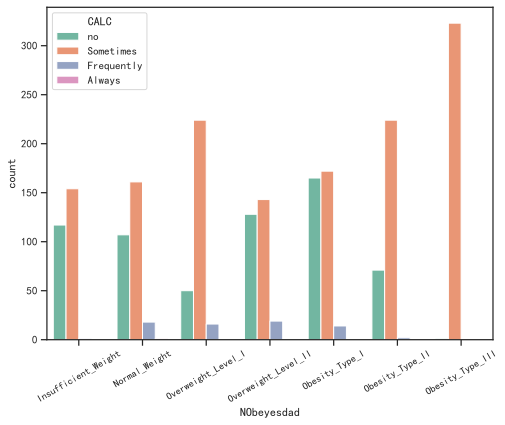

In [26]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='NObeyesdad',order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III'],hue='CALC',data=data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,size = 10) 
plt.show()

从此柱状图中得知，喝酒频率和患肥胖症状并不存在明显的因果关系，但是患肥胖症状的人群中大多数喝酒频率为`Sometimes`，结合次数据集年龄分布的特点，可以发现25岁左右的年轻人都会时常饮酒。

## 2.7 利用箱线图探究肥胖程度与年龄的关系

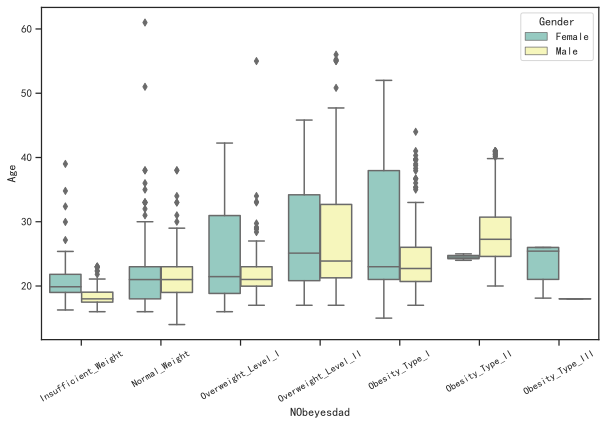

In [27]:
plt.figure(figsize=(10,6))

ax = sns.boxplot(x=data['NObeyesdad'],order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III'],y=data['Age'],hue=data['Gender'],palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,size = 10) 
# plt.title('不同肥胖程度人群年龄分布')
plt.show()

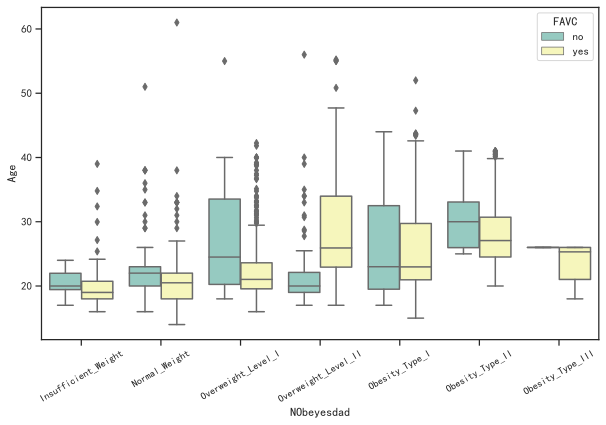

In [28]:
plt.figure(figsize=(10,6))

ax = sns.boxplot(x=data['NObeyesdad'],order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III'],y=data['Age'],hue=data['FAVC'],palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,size = 10) 
# plt.title('不同肥胖程度人群年龄分布')
plt.show()

通过图中箱线图，`Normal_Weight`和`Insufficient_Weight`的箱线图分布较为集中，因此可以得出正常体重和体重不足的人多集中在二十岁左右；然而肥胖人群的分布较为分散，整体分布在20到30岁之间，可以得出随着年龄趋近于30岁，人更容易患肥胖症状。其中，`Obesity_Type_I`的人群跨度最大，从20岁到50均有分布，因此可以看出患肥胖I型和年龄没有明显的相关性，各个年龄段均可能患此肥胖症。

# 3. 总结

该数据是关于墨西哥人肥胖程度的相关数据，首先通过查询数值型和非数值型数据的基本信息和分布情况，对数据有一个大致的了解，然后通过热力图初步判断之后需要探究哪些字段之间的相关性；由于从热力图中得出年龄与使用技术设备之间存在一定的负相关性，因此绘制散点图展示此关系。接着，此次案例探究了肥胖程度与性别、饮酒频率和家庭肥胖史之间的关系，并分别用饼图，柱状图以及箱线图展示，

通过上述探索性分析得到的图形，可以得出主要三个点：首先，关于此数据集的一个基本情况是男女分布较为均衡都在20-25岁左右；其次，男性比女性更容易患肥胖症状，肥胖症状非常容易受到家族肥胖症状的影响；最后，年龄越小使用技术设备的时间越长。